<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/DeepNN_CNN_Lab16_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

@ dataset

In [13]:
mnist=tf.keras.datasets.mnist

In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
y_train.shape

(60000,)

In [18]:
y_test.shape

(10000,)

In [19]:
x_train=x_train/255.0
x_test=x_test/255.0

In [20]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<function matplotlib.pyplot.show>

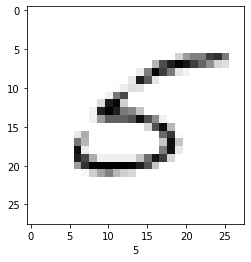

In [21]:
i=59993
plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.xlabel(y_train[i])
plt.show

In [22]:
y_train[0]

5

#Sequential

In [54]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [55]:
initializer=tf.keras.initializers.HeNormal()

In [56]:
activation=tf.keras.activations.relu

In [57]:
learning_rate=1e-2

In [63]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6,5,activation=activation,kernel_initializer=initializer,input_shape=(28,28,1))) #input shape 안넣어줘도 모델은 돌아간다. 하지만 summary가 안됨.
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16,3,activation=activation,kernel_initializer=initializer))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten()) # Flatten 한줄로 줄세우기

model.add(tf.keras.layers.Dense(120,activation=activation,kernel_initializer=initializer)) # Hidden layer
model.add(tf.keras.layers.Dense(84,activation=activation,kernel_initializer=initializer)) # Hidden layer

#model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer)) # Output(숫자 10개)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_19 (Dense)             (None, 84)               

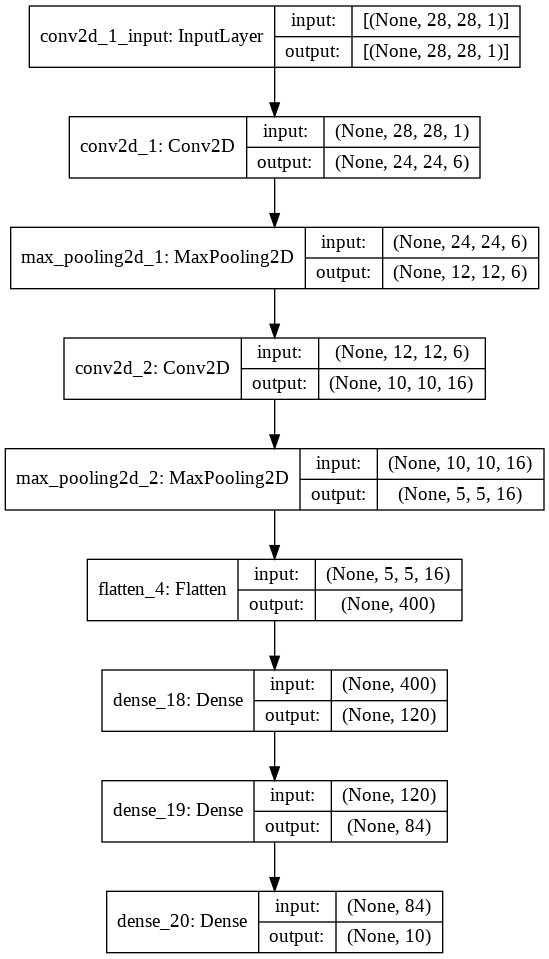

In [64]:
model.summary()
tf.keras.utils.plot_model(model,show_shapes='true')

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Onehot 인코딩을 안했으면 Sparse를 써야함
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [67]:
for i in range(5):
  print('epochs=',i)
  model.fit(x_train,y_train,batch_size=128,epochs=1) # 32개로 나누어서 60000개 계산
  model.evaluate(x_test,y_test)
 

epochs= 0
313/313 [==============================] - 2s 7ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0.9825
epochs= 1
313/313 [==============================] - 2s 7ms/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9766
epochs= 2
313/313 [==============================] - 2s 7ms/step - loss: 0.0676 - sparse_categorical_accuracy: 0.9811
epochs= 3
313/313 [==============================] - 2s 7ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9810
epochs= 4
313/313 [==============================] - 2s 7ms/step - loss: 0.0683 - sparse_categorical_accuracy: 0.9825


In [37]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.01079577, -0.06482558, -0.05058624, ..., -0.03827087,
          0.00480539, -0.06795745],
        [ 0.00967001, -0.01139664, -0.05134663, ...,  0.02935198,
         -0.00965731,  0.02207474],
        [ 0.06510058,  0.0277235 , -0.10201017, ...,  0.03939245,
          0.02264403, -0.10760543],
        ...,
        [-0.01181575, -0.05022551,  0.07171816, ..., -0.02518201,
          0.00049392, -0.0796885 ],
        [ 0.00375314,  0.04094702, -0.0092824 , ...,  0.01425047,
         -0.08480396, -0.01925617],
        [ 0.04364299, -0.04207112, -0.00505229, ..., -0.01509686,
          0.10194936, -0.00855185]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.02632865,  0.11689953, -0.06004053, -0.04785742, -0.08455548,
        -0.08886626, -0.14612332, -0.06781596, -0.03434991, -0.02095468,
        -0.096549  , -0.06621826,  0.03879501, -0.06134155, -0.088866  ,
